# Prediction horizon for Ferhulst equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

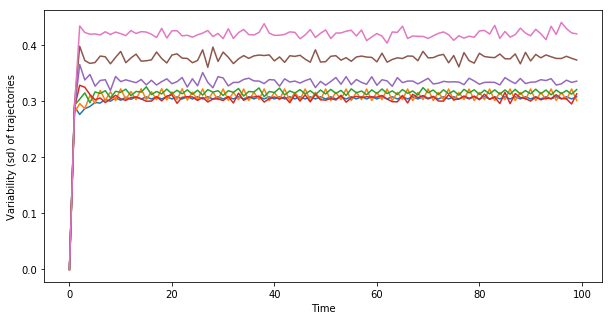

In [76]:
nsteps = 100
ntraces = 1000
x = np.zeros(shape=(nsteps,ntraces))
wiggle = 0.001

fig = plt.figure(figsize=(10,5))
for r in np.arange(3.4,4.0,0.1):
    for itrace in range(ntraces):
        x0 = np.random.uniform(low=0.1,high=0.9)
        x[0,itrace] = x0+np.random.randn(1)*wiggle
        for istep in range(1,nsteps):
            x[istep,itrace] = r*x[istep-1,itrace]*(1-x[istep-1,itrace])
    x = x - x[0,:]
    
    plt.plot(np.std(x,axis=1))

plt.xlabel('Time');
plt.ylabel('Variability (sd) of trajectories');

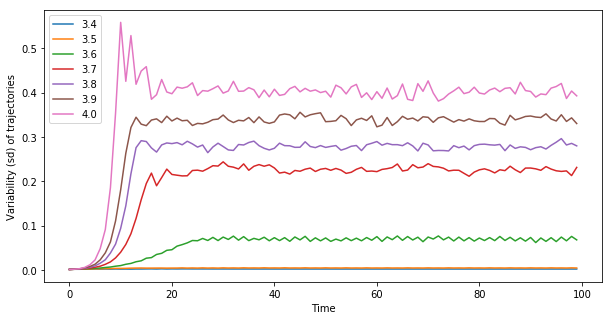

In [75]:
nsteps = 100
ntraces = 1000
x = np.zeros(shape=(nsteps,2))
history = np.zeros(shape=(nsteps,ntraces))
wiggle = 0.001

fig = plt.figure(figsize=(10,5))
for r in np.arange(3.4,4.0,0.1):
    for itrace in range(ntraces):
        x0 = np.random.uniform(low=0.1,high=0.9)
        x[0,0] = x0 
        x[0,1] = x0+wiggle
        for iversion in range(2):
            for istep in range(1,nsteps):
                x[istep,iversion] = r*x[istep-1,iversion]*(1-x[istep-1,iversion])
        history[:,itrace] = np.abs(x[:,1]-x[:,0])
    
    plt.plot(np.mean(history,axis=1),label=np.round(r,decimals=2))
    
plt.legend()
plt.xlabel('Time');
plt.ylabel('Variability (sd) of trajectories');